# Quick Start

## Installation

In [ ]:
# pip install db-robust-clust



To see the available versions of the package go to the release history at PyPi: https://pypi.org/project/db_robust_clust/#history


## Data

| Variable | Description | Variable Type | Possible Categories / Range |
|:---|:---|:---|:---|
| **latitude** | Latitude of the house | Quantitative | 24.86 - 25.27 |
| **longitude** | Longitude of the house | Quantitative | 55.06 - 55.44 |
| **price** | Market price of the house | Quantitative | 220000 - 35000000 |
| **price_per_sqft** | Price per square foot | Quantitative | 361.87 - 4805.87 |
| **size in sqft** | Size in square feet | Quantitative | 294 - 9576 |
| **no of bedrooms** | Number of bedrooms in the house | Multiclass | 0, 1, 2, 3, 4, 5 |
| **no of bathrooms** | Number of bathrooms in the house | Multiclass | 0, 1, 2, 3, 4, 5, 6 |
| **quality** | Quality level of the house *(response variable)* | Binary | Low (0), Medium-High-UltraHigh (1) |
| **balcony** | Indicates if the house has a balcony | Binary | true (1), false (0) |
| **barbecue area** | Indicates if the house has a barbecue area | Binary | true (1), false (0) |
| **private pool** | Indicates if the house has a private pool | Binary | true (1), false (0) |
| **private garden** | Indicates if the house has a private garden | Binary | true (1), false (0) |

**Note:**
The `quality` variable is the response (target) variable. The remaining variables are mixed-type predictors.

In [8]:
import polars as pl

data_url = "https://raw.githubusercontent.com/FabioScielzoOrtiz/db_robust_clust-docu/refs/heads/main/data/dubai_houses_processed.csv"
df = pl.read_csv(data_url)

response = 'quality'
quant_predictors = ['latitude', 'longitude', 'price', 'size_in_sqft', 'price_per_sqft']
binary_predictors = ['balcony', 'barbecue_area', 'private_pool', 'private_garden']
multiclass_predictors = ['no_of_bedrooms', 'no_of_bathrooms']

y = df[response]
X = df[quant_predictors + binary_predictors + multiclass_predictors]

In [9]:
y.head()

quality
i64
1
1
1
0
1
1
1
1
0


In [10]:
X.head()

latitude,longitude,price,size_in_sqft,price_per_sqft,balcony,barbecue_area,private_pool,private_garden,no_of_bedrooms,no_of_bathrooms
f64,f64,i64,i64,f64,i64,i64,i64,i64,i64,i64
25.113208,55.138932,2700000,1079,2502.32,1,1,0,0,1,2
25.106809,55.151201,2850000,1582,1801.52,1,0,0,0,2,2
25.063302,55.137728,1150000,1951,589.44,1,0,0,0,3,5
25.227295,55.341761,2850000,2020,1410.89,1,0,0,0,2,3
25.114275,55.139764,1729200,507,3410.65,0,0,0,0,0,1


## `db_robust_clust.models`

### `FastKmedoidsGGower`

In [11]:
from db_robust_clust.models import FastKmedoidsGGower

In [12]:
p1 = len(quant_predictors)
p2 = len(binary_predictors)
p3 = len(multiclass_predictors)

n_clusters = len(y.unique())

In [13]:
fast_kmedoids = FastKmedoidsGGower(
    n_clusters=n_clusters, 
    method='pam', 
    init='heuristic', 
    max_iter=100, 
    random_state=123,
    frac_sample_size=0.1, 
    p1=p1, 
    p2=p2, 
    p3=p3, 
    d1='robust_mahalanobis', 
    d2='sokal', 
    d3='hamming', 
    robust_method='trimmed', 
    alpha=0.05, 
    epsilon=0.05, 
    n_iters=20,
    fast_VG=False, 
    VG_sample_size=1000, 
    VG_n_samples=5
)

fast_kmedoids.fit(X=X) 

In [14]:
predicted_clusters_fast_kmedoids = fast_kmedoids.labels_

predicted_clusters_fast_kmedoids

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### `FoldFastKmedoidsGGower`

In [15]:
from db_robust_clust.models import FoldFastKmedoidsGGower

In [16]:
fold_fast_kmedoids = FoldFastKmedoidsGGower(
    n_clusters=n_clusters, 
    method='pam', 
    init='heuristic', 
    max_iter=100, 
    random_state=123,
    frac_sample_size=0.60, 
    n_splits=5, 
    shuffle=True, 
    kfold_random_state=123,
    p1=p1, 
    p2=p2, 
    p3=p3, 
    d1='robust_mahalanobis', 
    d2='sokal', 
    d3='hamming', 
    robust_method='trimmed', 
    alpha=0.05, 
    epsilon=0.05, 
    n_iters=20,
    fast_VG=False, 
    VG_sample_size=1000, 
    VG_n_samples=5
)

fold_fast_kmedoids.fit(X=X) 

Clustering Folds: 100%|██████████| 5/5 [00:02<00:00,  2.24it/s]


In [17]:
predicted_clusters_fold_fast_kmedoids = fold_fast_kmedoids.labels_

predicted_clusters_fold_fast_kmedoids

array([0, 0, 0, ..., 0, 0, 0])

## ` db_robust_clust.plots`

### `clustering_MDS_plot_one_method`

In [ ]:
from db_robust_clust.plots import clustering_MDS_plot_one_method
from sklearn.manifold import MDS
from db_robust_clust.mixed import FastGGowerDistMatrix
import seaborn as sns
sns.set_style('whitegrid')

In [19]:
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=123) 

fastGGower = FastGGowerDistMatrix(frac_sample_size=0.6, random_state=123, p1=p1, p2=p2, p3=p3, 
                                  d1='robust_mahalanobis', d2='sokal', d3='hamming', 
                                  robust_method='trimmed', alpha=0.05)
fastGGower.compute(X)

X_mds = mds.fit_transform(fastGGower.D_GGower)

c:\Users\fscielzo\Documents\Proyectos\db_robust_clust\db_robust_clust_docu\.venv\Lib\site-packages\sklearn\manifold\_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


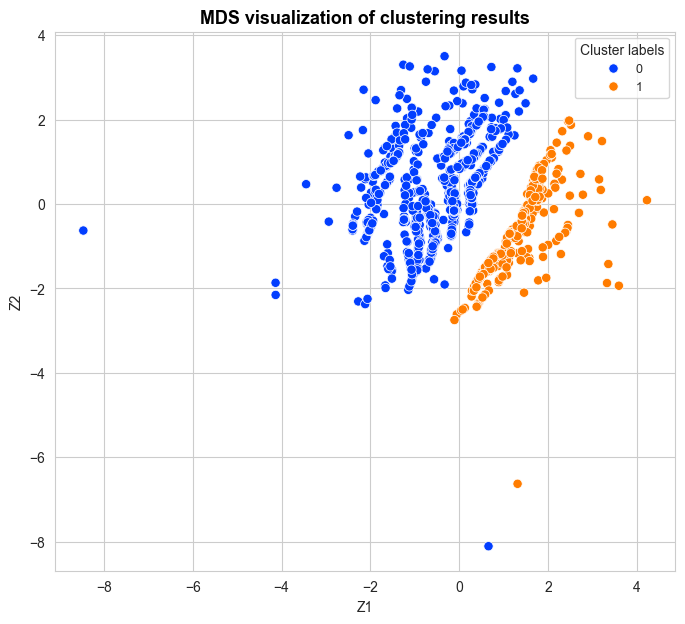

In [20]:
clustering_MDS_plot_one_method(X_mds=X_mds, y_pred=predicted_clusters_fast_kmedoids[fastGGower.sample_index], 
                               y_true=None, title="MDS visualization of clustering results", 
                               accuracy=None, time=None, 
                               figsize=(8,7), bbox_to_anchor=(1,1), 
                               title_size=13, title_weight='bold', 
                               points_size=45, title_height=1, 
                               save=False, legend_size=9)

### `clustering_MDS_plot_multiple_methods`

In [21]:
from db_robust_clust.plots import clustering_MDS_plot_multiple_methods
from db_robust_clust.metrics import adjusted_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
import time

In [22]:
start_time = time.time()
fast_kmedoids.fit(X=X) 
predicted_clusters_fast_kmedoids = fast_kmedoids.labels_
time_fast_kmedoids = time.time() - start_time

start_time = time.time()
fold_fast_kmedoids.fit(X=X) 
predicted_clusters_fold_fast_kmedoids = fold_fast_kmedoids.labels_
time_fold_fast_kmedoids = time.time() - start_time

start_time = time.time()
kmeans = KMeans(n_clusters=n_clusters, random_state=123, init='k-means++', n_init='auto', max_iter=300)
kmeans.fit(X)
predicted_clusters_kmeans = kmeans.labels_
time_kmeans = time.time() - start_time

start_time = time.time()
gmm = GaussianMixture(n_components=n_clusters, random_state=123)
gmm.fit(X)
predicted_clusters_gmm = gmm.predict(X)
time_gmm = time.time() - start_time

start_time = time.time()
kmedoids = KMedoids(n_clusters=n_clusters, metric='euclidean', method='pam', init='heuristic', max_iter=100, random_state=123)
kmedoids.fit(X)
predicted_clusters_kmedoids = kmedoids.predict(X)
time_kmedoids = time.time() - start_time

adj_accuracy_fast_kmedoids, adj_predicted_clusters_fast_kmedoids = adjusted_score(y_pred=predicted_clusters_fast_kmedoids, y_true=y, metric=balanced_accuracy_score)
adj_accuracy_fold_fast_kmedoids, adj_predicted_clusters_fold_fast_kmedoids = adjusted_score(y_pred=predicted_clusters_fold_fast_kmedoids, y_true=y, metric=balanced_accuracy_score)
adj_accuracy_kmeans, adj_predicted_clusters_kmeans = adjusted_score(y_pred=predicted_clusters_kmeans, y_true=y, metric=balanced_accuracy_score)
adj_accuracy_gmm, adj_predicted_clusters_gmm = adjusted_score(y_pred=predicted_clusters_gmm, y_true=y, metric=balanced_accuracy_score)
adj_accuracy_kmedoids, adj_predicted_clusters_kmedoids = adjusted_score(y_pred=predicted_clusters_kmedoids, y_true=y, metric=balanced_accuracy_score)


Clustering Folds: 100%|██████████| 5/5 [00:02<00:00,  2.42it/s]


In [23]:
y_pred_dict = {
    'FastKmedoids-RobustGGower': adj_predicted_clusters_fast_kmedoids[fastGGower.sample_index],
    'FoldFastKmedoids-RobustGGower': adj_predicted_clusters_fold_fast_kmedoids[fastGGower.sample_index],
    'Kmeans': adj_predicted_clusters_kmeans[fastGGower.sample_index],
    'GMM': adj_predicted_clusters_gmm[fastGGower.sample_index],
    'Kmedoids': adj_predicted_clusters_kmedoids[fastGGower.sample_index]
}

accuracy_dict = {
    'FastKmedoids-RobustGGower': adj_accuracy_fast_kmedoids,
    'FoldFastKmedoids-RobustGGower': adj_accuracy_fold_fast_kmedoids,
    'Kmeans': adj_accuracy_kmeans,
    'GMM': adj_accuracy_gmm,
    'Kmedoids': adj_accuracy_kmedoids,
}

time_dict = {
    'FastKmedoids-RobustGGower': time_fast_kmedoids,
    'FoldFastKmedoids-RobustGGower': time_fold_fast_kmedoids,
    'Kmeans': time_kmeans,
    'GMM': time_gmm,
    'Kmedoids': time_kmedoids,
}

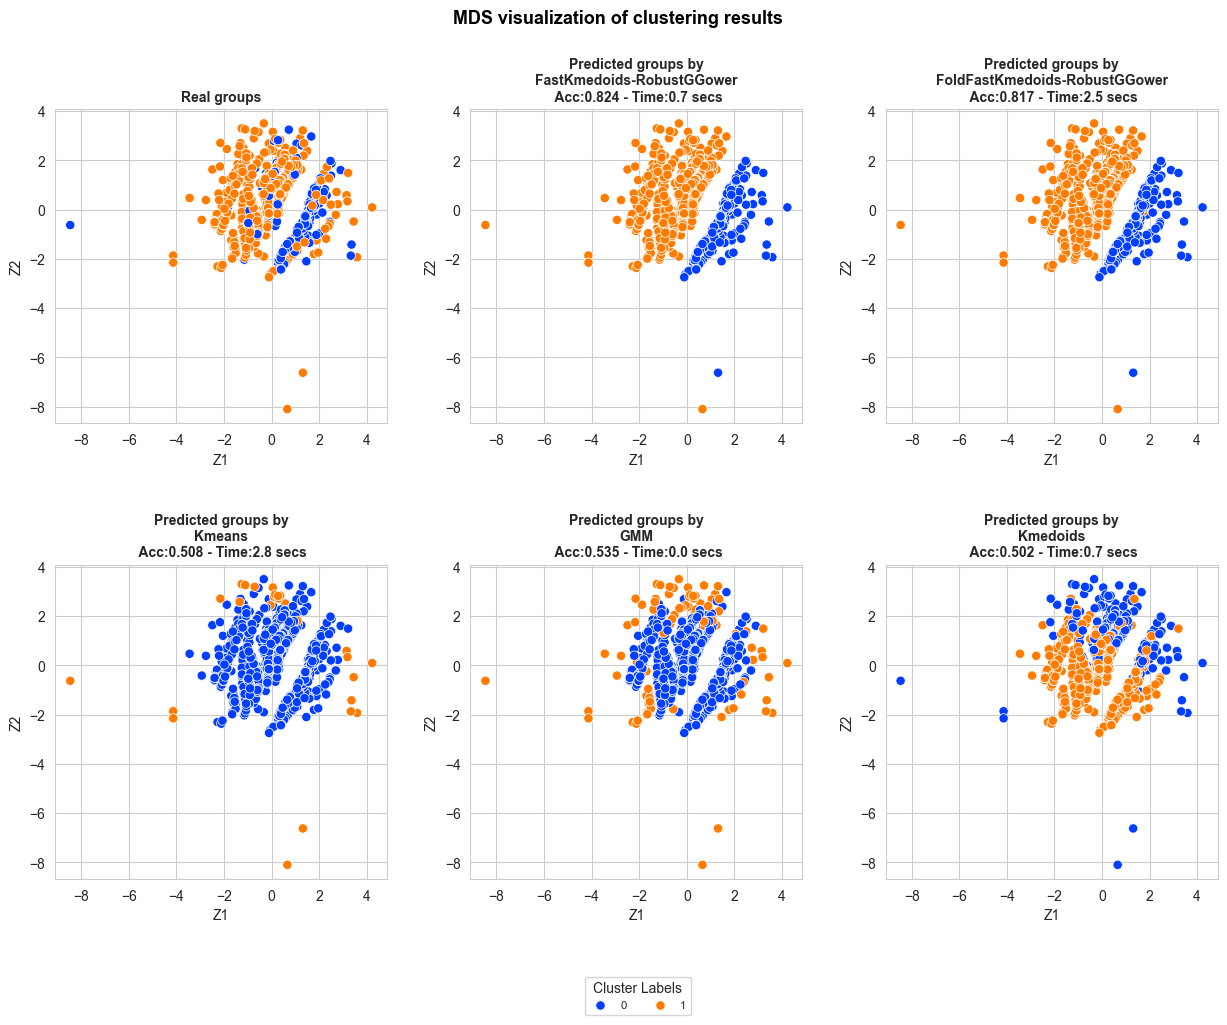

In [24]:
clustering_MDS_plot_multiple_methods(X_mds=X_mds, y_pred=y_pred_dict, 
                                     y_true=y[fastGGower.sample_index],
                                     title="MDS visualization of clustering results", 
                                     accuracy=accuracy_dict, time=time_dict, n_rows=2,
                                     figsize=(15,10), bbox_to_anchor=(0.68,-1.9), 
                                     title_size=13, subtitles_size=10,
                                     title_weight='bold', points_size=45, 
                                     title_height=0.98, legend_size=8, 
                                     wspace=0.25, hspace=0.45, 
                                     legend_title='Cluster Labels',
                                     n_cols_legend=4, save=False)